# **Segundo Parcial SIS420**
Arancibia Aguilar Daniel Andree

Ingeniería en Ciencias de la Computación

In [16]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
import os
# Cálculo científico y vectorial para python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [24]:
# Preprocesamiento 2


url = "/content/gdrive/MyDrive/SIS420/Segundo Parcial SIS420/Dataset2.csv"
dataframe = pd.read_csv(url)

# Lista de nombres de columnas
column_names = [
    'dateTime_precipitation', 'to', 'intensity_index', 'postcode'
]

#Iterar sobre cada nombre de columna y aplicar el encoder
for columna in column_names:
    columna_n = dataframe[columna].values.reshape(-1, 1)
    dataframe[columna] = ordinal_encoder.fit_transform(columna_n)

#Verificar el resultado
print(dataframe)

dataframe.dropna(inplace=True)
print(dataframe.isnull().sum())

dataframe.describe()

        dateTime_precipitation  value_eccup  value_headingley  value_farnley  \
0                      12097.0          0.2               0.4            0.4   
1                      12098.0          0.2               0.0            0.4   
2                      12099.0          0.2               0.0            0.2   
3                      12100.0          0.4               0.6            0.4   
4                      12101.0          0.0               0.0            0.2   
...                        ...          ...               ...            ...   
359084                   667.0          0.0               0.0            0.0   
359085                   668.0          0.0               0.0            0.0   
359086                   669.0          0.0               0.0            0.0   
359087                   670.0          0.0               0.0            0.0   
359088                   671.0          0.0               0.0            0.0   

        value_knostrop  value_heckmondw

,dateTime_precipitation,value_eccup,value_headingley,value_farnley,value_knostrop,value_heckmondwike,value_bramham,to,forecast_intensity,intensity_index,...,Longwave Radiation - Outgoing_SPN,Atmospheric Pressure_SPN,Precipitation (Pluvio)_SPN,Absolute Humidity_SPN,Relative Humidity_SPN,Net Radiation_SPN,Shortwave Radiation - Incoming_SPN,Air Temperature_SPN,Wind Direction_SPN,Wind Speed_SPN
count,356758.000000,356758.000000,356758.000000,356758.000000,356758.000000,356758.000000,356758.00000,356758.000000,356758.000000,356758.000000,...,356758.000000,356758.000000,356758.00000,356758.000000,356758.000000,356758.000000,356758.000000,356758.000000,356758.000000,356758.000000
mean,6153.689913,0.055064,0.051179,0.052496,0.045456,0.039277,0.04622,6153.691270,182.449195,1.089335,...,378.851788,1006.985121,0.04341,8.935589,79.798454,79.401750,149.249103,12.546416,200.668377,2.844502
std,3556.631033,0.284405,0.261833,0.252869,0.253812,0.219322,0.24152,3556.633229,66.938759,0.962846,...,31.806895,11.219966,0.23754,2.541109,15.130043,154.395938,215.219692,5.347828,98.480741,1.645327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,0.000000,...,291.800000,971.740000,0.00000,2.530000,30.580000,-87.920000,-6.670000,-3.850000,0.030000,0.250000
25%,3075.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3075.000000,128.000000,0.000000,...,357.700000,1000.750000,0.00000,7.200000,69.850000,-22.630000,-1.110000,9.000000,127.720000,1.610000
50%,6150.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,6150.500000,182.000000,1.000000,...,377.400000,1008.450000,0.00000,8.760000,82.500000,2.245000,31.755000,12.710000,217.130000,2.500000
75%,9226.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,9226.000000,237.000000,2.000000,...,398.200000,1014.600000,0.00000,10.690000,92.300000,147.140000,237.800000,16.200000,280.020000,3.780000
max,12384.000000,8.800000,7.600000,6.200000,12.000000,6.130000,7.20000,12384.000000,369.000000,4.000000,...,488.000000,1030.090000,6.55000,17.760000,101.200000,699.000000,986.000000,28.380000,359.980000,12.840000


In [25]:
X = dataframe.values

In [26]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [27]:
print(X_train.shape)

(285406, 53)


In [29]:
X_trainNp = X_train

In [30]:
from sklearn.metrics import silhouette_score
sample_size = 50000
if X_trainNp.shape[0] > sample_size:
    sample_indices = np.random.choice(X_trainNp.shape[0], size=sample_size, replace=False)
    sample_X = X_trainNp[sample_indices]
else:
    sample_X = X_trainNp

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.p

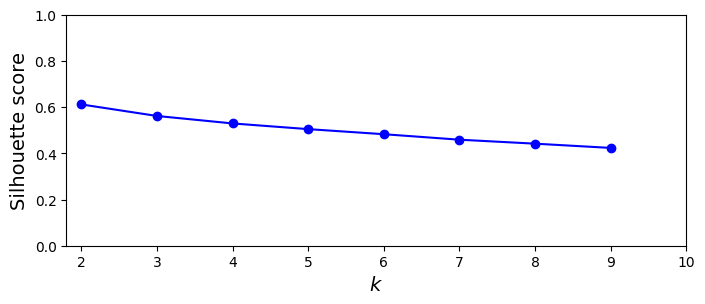

In [32]:
from sklearn.metrics import silhouette_score
KMeans_per_k = [KMeans(n_clusters=k, init="random", n_init=10, algorithm="full", random_state=11).fit(sample_X)
                for k in range(1, 10)] #se crea una lista de modelos k-means, uno por cada numero de clusters (1-9)

silhouette_scores = [silhouette_score(sample_X, model.labels_)
                     for model in KMeans_per_k[1:]] #se calculan los puntajes de silueta para todos los modelos

plt.figure(figsize=(8, 3)) #se crea una figura de 8x3 pulgadas
plt.plot(range(2, 10), silhouette_scores, "bo-") #se grafican los puntajes de silueta con puntos azules
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 10.0, 0.0, 1]) #se establece el rago para el eje x y el eje y
plt.show()

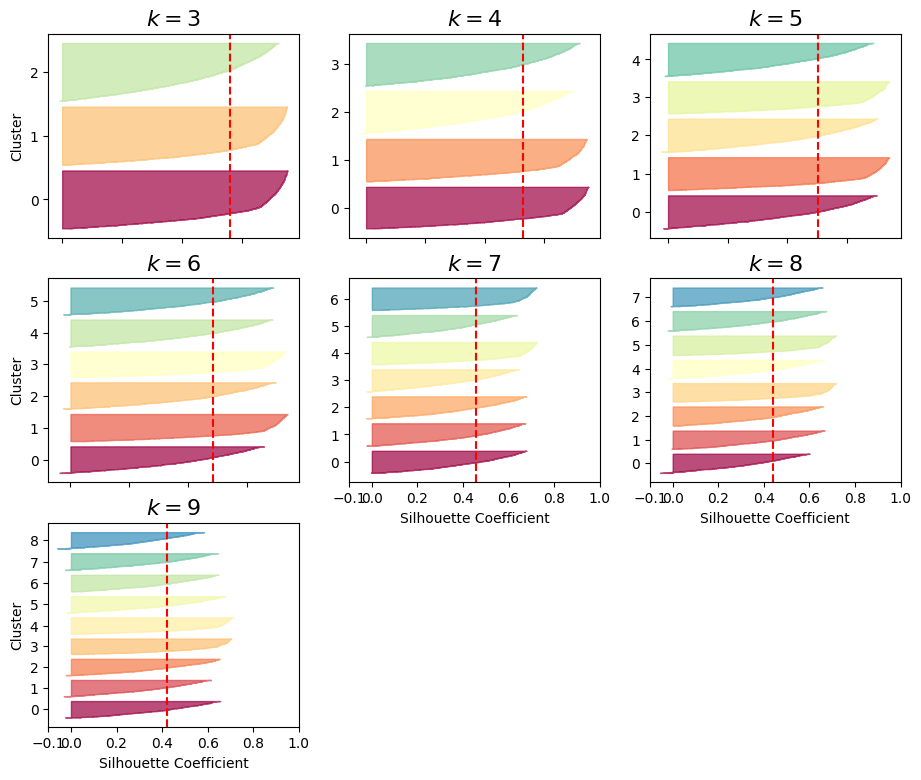

In [34]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

# Crear una figura de 11x9 pulgadas
plt.figure(figsize=(11, 9))

n_rows = 3  # número de filas en la cuadrícula de subgráficos
n_cols = 3  # número de columnas en la cuadrícula de subgráficos

for k in range(3, 10):  # se itera por los valores de k (numero de clusters)
    index = k - 3  # calcula el índice correcto para el subgráfico
    plt.subplot(n_rows, n_cols, index + 1)  # crea un subgrafico para cada uno

    y_pred = KMeans_per_k[k - 1].labels_  # se obtienen las etiquetas
    silhouette_coefficients = silhouette_samples(sample_X, y_pred)  # se calculan los coeficientes de las siluetas para cada muestra

    padding = len(sample_X) // 30  # se establece un espacio entre los graficos de silueta de cada cluster
    pos = padding
    ticks = []  # cada tick representara el centro de un cluster
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]  # se seleccionan los coeficientes correspondiente al cluster i
        coeffs.sort()  # se ordenan los coeficientes

        color = mpl.cm.Spectral(i / k)  # se asigna un color a cada cluster
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)  # se crea un grafico para los coeficientes
        ticks.append(pos + len(coeffs) // 2)  # se adiciona la posicion del centro del area de silueta
        pos += len(coeffs) + padding  # se actualiza la posicion para el siguiente cluster

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 6, 9):
        plt.ylabel("Cluster")

    if k in (7, 8, 9):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")  # se dibuja una linea con el valor medio del coeficiente de silueta
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [43]:
from sklearn.cluster import KMeans

k = 4 #establece el numero de clusters (grupos)
kmeans = KMeans(n_clusters=k, random_state=42) #incializa el modelo
X_digits_dist = kmeans.fit_transform(X_train)#calcula las distancias de los datos a todos los centroides

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [46]:
idxs = np.argmin(X_digits_dist, axis=0)#calcula los indices de las distancias minimas para cada columna
X_representative_digits = X_train[idxs]#devuleve las muestras mas representativas por cada columna